In [26]:
from utils.data_loader import load_data, load_file, convert_signal
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget


In [10]:
subject = 'mci009'
day = '2024-02-07'
sessions = ['31']
files = {}
root_folder = "./COP analysis"

root = f"{root_folder}/data/{subject}"
dates = os.listdir(root)

files = []
for file in os.listdir(f"{root}/{day}"):
    match = re.search(r"S(\d+)_", file)
    session = match.group(1)
    if session in sessions:
        files.append(os.path.join(root, day, file))
        
files


['./COP analysis/data/mci009\\2024-02-07\\S31_20240207_rawDataLeft_P82NOu8e2y.txt',
 './COP analysis/data/mci009\\2024-02-07\\S31_20240207_rawDataRight_P82NOu8e2y.txt']

In [24]:
raw_left = load_file(files[0])
raw_right = load_file(files[1])

time = {}
time['left'] = [x * 0.05 for x in range(len(raw_left))]
time['right'] = [x * 0.05 for x in range(len(raw_right))]

--------------
reading data file ./COP analysis/data/mci009\2024-02-07\S31_20240207_rawDataLeft_P82NOu8e2y.txt
21 columns found
--------------
reading data file ./COP analysis/data/mci009\2024-02-07\S31_20240207_rawDataRight_P82NOu8e2y.txt
21 columns found


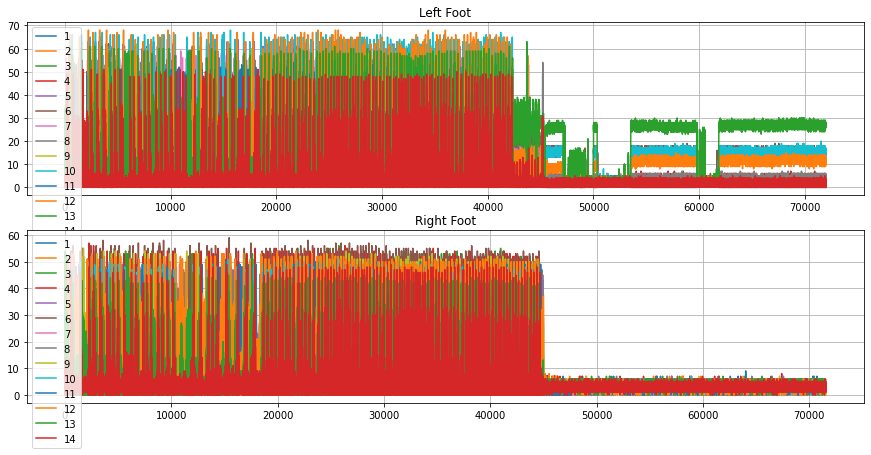

In [17]:
d = raw_left[['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
for col in d.columns:
    plt.plot(d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Left Foot')

d = raw_right[['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.subplot(2,1,2)
for col in d.columns:
    plt.plot(d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Right Foot')

plt.show()

In [23]:
acc = {}
acc['left'] = convert_signal(raw_left, "acc_total")
acc['right'] = convert_signal(raw_right, "acc_total")


pressure = {}
pressure['left'] = convert_signal(raw_left, "pressure")
pressure['right'] = convert_signal(raw_right, "pressure")

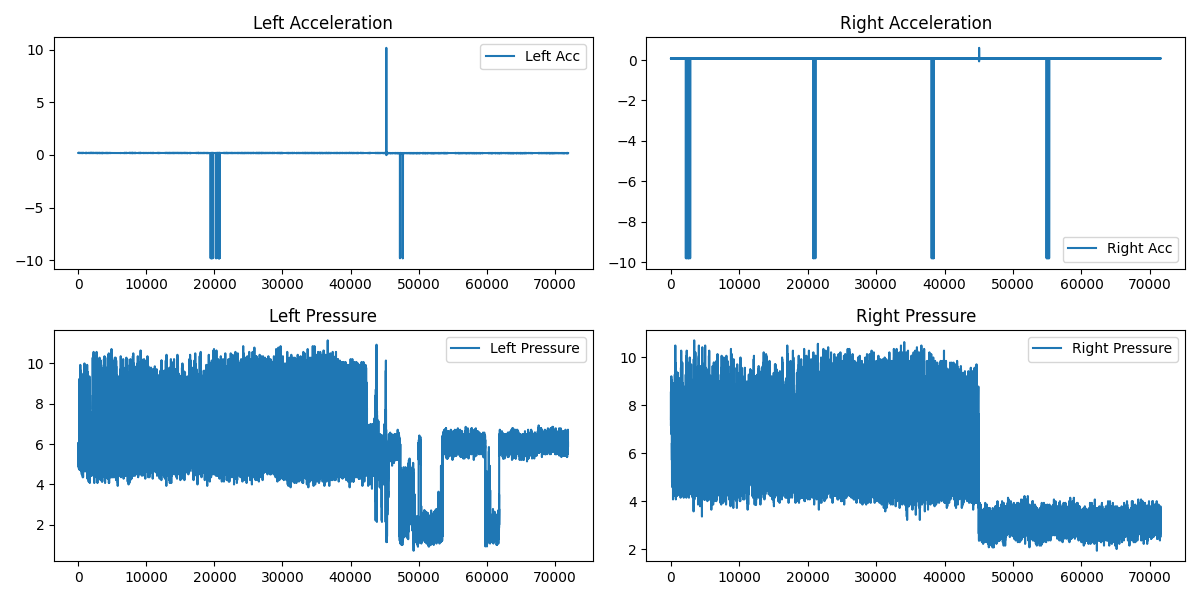

In [27]:
# Plotting Acceleration
plt.figure(figsize=(12, 6))

# Left Acceleration
plt.subplot(2, 2, 1)
plt.plot(acc['left'], label='Left Acc')
plt.title('Left Acceleration')
plt.legend()

# Right Acceleration
plt.subplot(2, 2, 2)
plt.plot(acc['right'], label='Right Acc')
plt.title('Right Acceleration')
plt.legend()

# Plotting Pressure
# Left Pressure
plt.subplot(2, 2, 3)
plt.plot(pressure['left'], label='Left Pressure')
plt.title('Left Pressure')
plt.legend()

# Right Pressure
plt.subplot(2, 2, 4)
plt.plot(pressure['right'], label='Right Pressure')
plt.title('Right Pressure')
plt.legend()

plt.tight_layout()
plt.show()